The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[[ 84.5  75.5  37.7]
  [149.5 137.5  51.9]]]


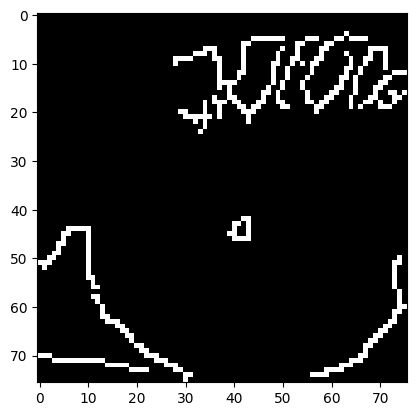

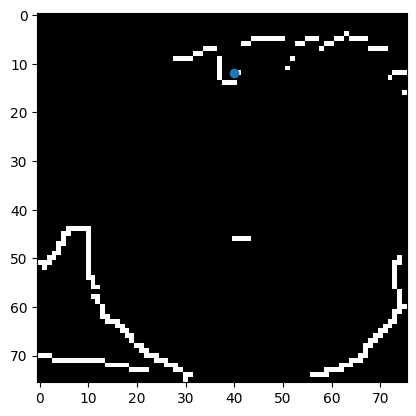

In [9]:
# for when loading from modules that we wrote ourselves and changing them: you don't have to reload the notebook again
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from utility.utils import *
from utility.eyelidutils import *
path1='casesUn\case1\case1LTNormal.jpg'
path2='casesUn\case1\case1RTNormal.jpg'

originalimage,circle=getbo2leela(path1)
x,y,r=circle
# use the circle to crop the image
left = x-r
right = x+r
top = y-r
bottom = y+r
cropped = originalimage[int(top):int(bottom), int(left):int(right)]
# plt.imshow(cropped,cmap='gray')
# plt.show()

# apply gaussian blur
blurred = cv2.GaussianBlur(cropped, (5, 5), 0.9)
# plt.imshow(blurred,cmap='gray')
# plt.show()

edges = cv2.Canny(blurred, 50, 200)
plt.imshow(edges,cmap='gray')
plt.show()

# print(np.unique(edges))
pupilx,pupily=get_center(cropped,False,lowcanny=450,highcanny=600)

#mark the pupil
# plt.imshow(cropped,cmap='gray')
# plt.scatter(pupilx,pupily) 
# plt.show()

# from the pupil center, keep going up until you find the first white pixel
# this is approximately the eyelid or eyebrow
# The first detected edge is recorded as 
# a candidate for the eyelid path if it is connected to another edge(s) either horizontally 
# or diagonally and all other edges connected vertically to this edge are removed. This 
# scan is expected to remove most of the unwanted edges, especially those that belong 
# to eyelashes.
y_L1=0
edgesCopy=edges.copy()
for horizmover in range(1,edgesCopy.shape[1]-1):
    for i in range(0,pupily-10):
        if edgesCopy[i,horizmover]==255:
            # y_L1=i
            isConnectedHorizontally= edgesCopy[i,horizmover+1]==255 or edgesCopy[i,horizmover-1]==255 
            isConnectedDiagonally=edgesCopy[i+1,horizmover+1]==255 or edgesCopy[i+1,horizmover-1]==255
            isConnectedDiagonally2=edgesCopy[i-1,horizmover+1]==255 or edgesCopy[i-1,horizmover-1]==255
            if isConnectedHorizontally or isConnectedDiagonally or isConnectedDiagonally2:
                # remove all other edges connected vertically to this edge
                y_L1=i
                for j in range(i+1,pupily):
                    if edgesCopy[j,horizmover]==255:
                        edgesCopy[j,horizmover]=0

#draw a line on the y_L1
# plt.imshow(cropped,cmap='gray')
# plt.scatter(pupilx,pupily)
# plt.axhline(y=y_L1, color='r', linestyle='-')
# plt.show()
# show edge copy 
plt.imshow(edgesCopy,cmap='gray')
# mark the pupil
# plt.scatter(pupilx,y_L1)
plt.show()

